# Центральная предельная теорема своими руками

## Задача:

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import math

Выберем распределением случайной величины Экспоненциальное распределение (ссылки: https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5 ; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon

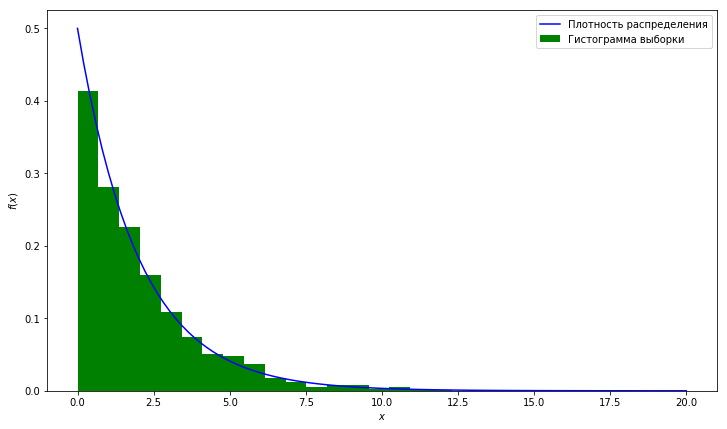

In [2]:
# Параметр распределения
lambd = 0.5

# Зададим случайную величину экспоненциальным распределением
expon_rv = sts.expon(scale = 1 / lambd)

# Сгенерируем 1000 значений
sample_expon = expon_rv.rvs(1000)

# Редактирование окна графика
figsize = (12, 7)
plt.figure(figsize = figsize, frameon = True)

# Построим гистограмму выборки
plt.hist(sample_expon, normed = True, bins = 20, color = 'green', label = u'Гистограмма выборки')

# Теоретическая плотность распределения случайной величины
x = np.linspace(0, 20, 100)
pdf = expon_rv.pdf(x)

# Построим график плотности распределения случайной величины
plt.plot(x, pdf, color = 'blue', label = u'Плотность распределения')

# Легенда
plt.legend(loc = 'upper right', frameon = True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Вычисление теоретических математического ожидания и дисперсии исходного распределения:

$$E[X] = \frac{1}{\lambda}$$

$$D[X] = \frac{1}{\lambda^2}$$

In [3]:
EX = 1 / lambd
DX = 1 / math.pow(lambd, 2)
print 'EX = ', EX, 'DX = ', DX

EX =  2.0 DX =  4.0


In [4]:
# Функция генерации выборок и подсчета выборочных средних
def generate(n, EX, DX):
    
    # Генерируем выборки
    sample = np.array([expon_rv.rvs(n) for x in range(1000)])
    
    # Вычисляем среднее по выборке
    mid_sample = sample.mean(axis = 1) # счет идет по строке
    
    # Редактирование окна графика
    figsize = (12, 7)
    plt.figure(figsize = figsize, frameon = True)
    
    # Построим гистограмму распределений выборочных средних
    plt.hist(mid_sample, normed = True, bins = 20, color = 'green', label = u'Гистограмма выборочных средних')
    
    # Среднее значение и стандартное отклонение нормального распределения
    Mu = EX
    Sig = math.sqrt(DX / n)
    
    # Нормальное распределение
    norm_rv = sts.norm(loc = Mu, scale = Sig)
    x = np.linspace(-2, 6, 100)
    pdf = norm_rv.pdf(x)
    
    # График плотности нормального распределения
    plt.plot(x, pdf, color = 'blue', label = u'Плотность нормального распределения')
    
    # Легенда
    plt.legend(loc = 'upper right', frameon = True)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

Для различных выборок получим:

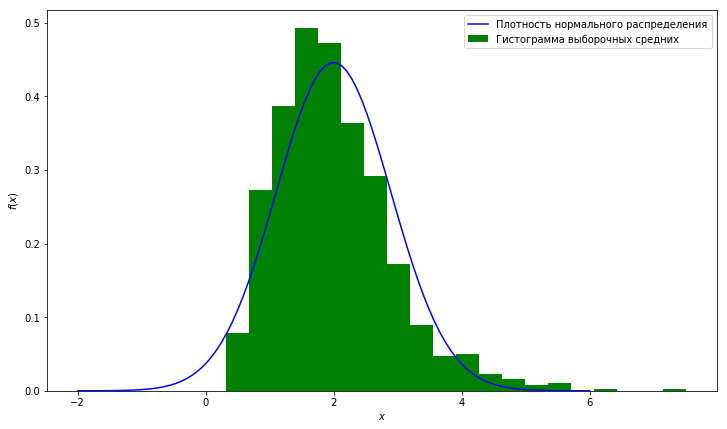

In [25]:
generate(5, EX, DX)

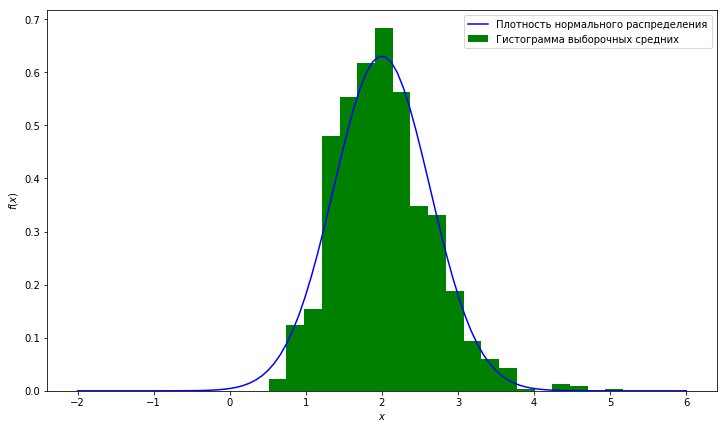

In [26]:
generate(10, EX, DX)

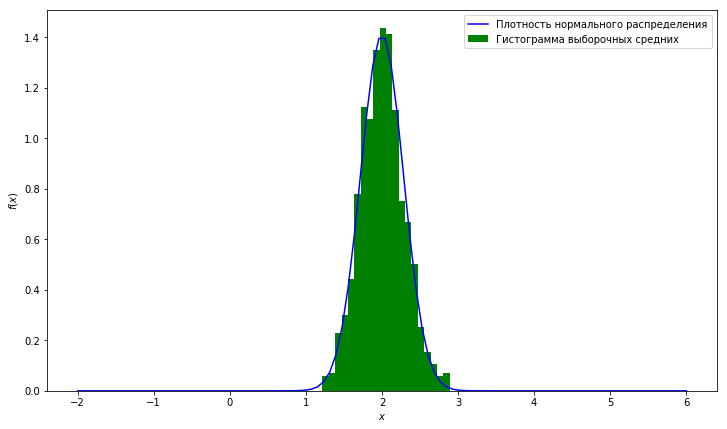

In [27]:
generate(50, EX, DX)

## Вывод:

При увеличении объема выборок полученное распределение выборочных средних становится все более гладким и все более похожим на нормальное. Таким образом, центральная предельная теорема в данном случае работает.